In [ ]:
## numpy monte Carlo estimate pi

[0.5488135  0.71518937 0.60276338 ... 0.36259133 0.51650652 0.90860588]
[ True False False ...  True False False]


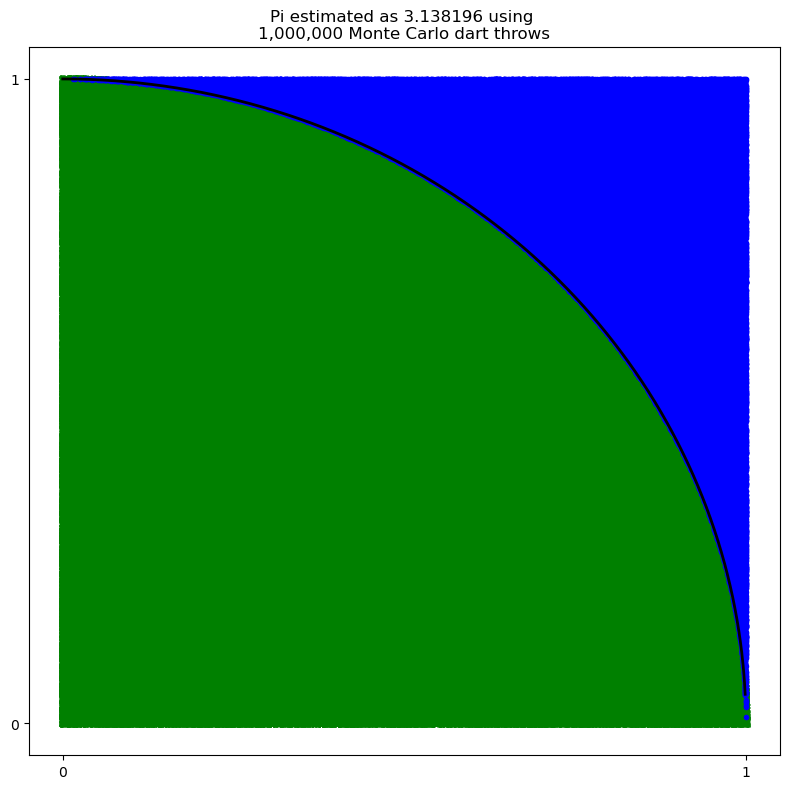

In [6]:
import numpy as np
import matplotlib.pyplot as plt


if __name__ == "__main__":
    np.random.seed(0)  # force repeatable plt
    nbr_items = int(1E6)
    xs = np.random.uniform(0, 1, nbr_items)
    print(xs)
    ys = np.random.uniform(0, 1, nbr_items)
    estimate_inside_quarter_unit_circle = (xs * xs + ys * ys) <= 1
    print(estimate_inside_quarter_unit_circle)
    nbr_trials_in_quarter_unit_circle = np.sum(estimate_inside_quarter_unit_circle)
    pi = (nbr_trials_in_quarter_unit_circle * 4) / nbr_items  # estimate for the full circle

    plt.figure(1, figsize=(8, 8))
    plt.clf()
    plt.plot(xs[estimate_inside_quarter_unit_circle], ys[estimate_inside_quarter_unit_circle], 'gx')
    plt.plot(xs[estimate_inside_quarter_unit_circle == False], ys[estimate_inside_quarter_unit_circle == False], 'b.')

    unit_circle_xs = np.arange(0, 1, 0.001)
    unit_circle_ys = np.sin(np.arccos(unit_circle_xs))
    plt.plot(unit_circle_xs, unit_circle_ys, linewidth=2, c="k")
    plt.xticks([0.0, 1.0])
    plt.yticks([0.0, 1.0])
    plt.title("Pi estimated as {} using \n{:,} Monte Carlo dart throws".format(pi, int(nbr_items)))
    #plt.show()
    plt.tight_layout()
    plt.savefig("09_pi_plot_monte_carlo_example.png")

In [ ]:
## multi process or threads to estimate pi

In [7]:
"""Estimate Pi using Threads and Processes"""
import time
import argparse
import numpy as np


def estimate_nbr_points_in_quarter_circle(nbr_samples):
    """Estimate Pi using vectorised numpy arrays"""
    print(f"in est numsamples {nbr_samples}")
    np.random.seed() # remember to set the seed per process
    xs = np.random.uniform(0, 1, nbr_samples)
    ys = np.random.uniform(0, 1, nbr_samples)
    estimate_inside_quarter_unit_circle = (xs * xs + ys * ys) <= 1
    nbr_trials_in_quarter_unit_circle = np.sum(estimate_inside_quarter_unit_circle)
    return nbr_trials_in_quarter_unit_circle



#from multiprocessing import Pool
#from multiprocessing.dummy import Pool
from multiprocess import Pool



nbr_samples_in_total = 1e8
nbr_parallel_blocks = 4

nbr_samples_per_worker = int(nbr_samples_in_total / nbr_parallel_blocks)
print("Making {} samples per worker".format(nbr_samples_per_worker))

# confirm we have an integer number of jobs to distribute
assert nbr_samples_per_worker == int(nbr_samples_per_worker)
nbr_samples_per_worker == int(nbr_samples_per_worker)
map_inputs = [nbr_samples_per_worker] * nbr_parallel_blocks
print(map_inputs)

with Pool(4) as pool:
        # execute tasks, block until all complete
        t1 = time.time()
        results = pool.map(estimate_nbr_points_in_quarter_circle, map_inputs)
        print("Dart throws in unit circle per worker:", results)
        print("Took {}s".format(time.time() - t1))
        nbr_in_circle = sum(results)
        combined_nbr_samples = sum(map_inputs)

pi_estimate = float(nbr_in_circle) / combined_nbr_samples * 4
print("Estimated pi", pi_estimate)
print("Pi", np.pi)

Making 25000000 samples per worker
[25000000, 25000000, 25000000, 25000000]
in est numsamples 25000000
in est numsamples 25000000
in est numsamples 25000000
in est numsamples 25000000
Dart throws in unit circle per worker: [19636489, 19637067, 19636284, 19638043]
Took 0.9841721057891846s
Estimated pi 3.14191532
Pi 3.141592653589793


In [11]:
from random import random
from time import sleep
#from multiprocessing.pool import Pool
from multiprocess.pool import Pool

 
# task executed in a worker process
def task(identifier):
    # generate a value
    value = random()
    # report a message
    print(f'Task {identifier} executing with {value}', flush=True)
    # block for a moment
    sleep(1)
    # return the generated value
    return value
 
# protect the entry point
#if __name__ == '__main__':
    # create and configure the process pool
with Pool(4) as pool:
    # execute tasks, block until all complete
    pool.map(task, range(20), chunksize=5)
# process pool is closed automatically

Task 0 executing with 0.12859663706722557Task 15 executing with 0.2971186376375824Task 10 executing with 0.73055019437764Task 5 executing with 0.8366906727214548



Task 1 executing with 0.5855501690845064Task 6 executing with 0.12571074450745856Task 16 executing with 0.7235374462486056Task 11 executing with 0.8271128552985652



Task 7 executing with 0.24802871244504943Task 17 executing with 0.005071557020550399Task 2 executing with 0.5140663146053319Task 12 executing with 0.4963453611241546



Task 13 executing with 0.4328681113514288Task 8 executing with 0.05901115454850414Task 3 executing with 0.04088365413288797Task 18 executing with 0.7349979037507369



Task 9 executing with 0.48293990258168595Task 4 executing with 0.5923003214113992Task 19 executing with 0.8815004137659757Task 14 executing with 0.9407586349170259





In [ ]:
## numpy using serial blocks


In [12]:
"""Estimate Pi using blocks of serial work on 1 CPU"""
import time
import numpy as np


def estimate_nbr_points_in_circle(nbr_samples):
    # set random seed for numpy in each new process
    # else the fork will mean they all share the same state
    np.random.seed()
    xs = np.random.uniform(0, 1, nbr_samples)
    ys = np.random.uniform(0, 1, nbr_samples)
    estimate_inside_quarter_unit_circle = (xs * xs + ys * ys) <= 1
    nbr_trials_in_quarter_unit_circle = np.sum(estimate_inside_quarter_unit_circle)
    return nbr_trials_in_quarter_unit_circle


#if __name__ == "__main__":
nbr_samples_in_total = (1e8)

nbr_parallel_blocks = 4
nbr_samples_per_worker = int(nbr_samples_in_total / nbr_parallel_blocks)
print("Making {} samples per worker".format(nbr_samples_per_worker))

t1 = time.time()
nbr_in_circle = 0
for npb in range(nbr_parallel_blocks):
    nbr_in_circle += estimate_nbr_points_in_circle(nbr_samples_per_worker)
print("Took {}s".format(time.time() - t1))
pi_estimate = float(nbr_in_circle) / nbr_samples_in_total * 4
print("Estimated pi", pi_estimate)
print("Pi", np.pi)

Making 25000000 samples per worker
Took 1.2754809856414795s
Estimated pi 3.14182432
Pi 3.141592653589793
